In [4]:
#!pip install pycaret

In [5]:
from pycaret.datasets import get_data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [6]:
df_reg = get_data('boston')
df_clf = get_data('iris')
X_reg = df_reg.drop('medv',axis=1)
Y_reg = df_reg.medv
X_clf = df_clf.drop('species',axis=1)
Y_clf = LabelEncoder().fit_transform(df_clf.species)
x_trainr,x_testr,y_trainr,y_testr = train_test_split(X_reg,Y_reg)
x_trainc,x_testc,y_trainc,y_testc = train_test_split(X_clf,Y_clf)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Regressão

## Linear Regression

* from sklearn.linear_model import LinearRegression

* Sem parametros importantes

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln = LinearRegression()
ln.fit(x_trainr,y_trainr)
r2_score(y_testr,ln.predict(x_testr))

0.705186162322073

In [ ]:
ln.coef_

array([-1.07952194e-01,  5.22282052e-02, -5.95065612e-02,  2.38238642e+00,
       -1.44657113e+01,  3.20423455e+00, -8.50002222e-03, -1.63157774e+00,
        2.86179058e-01, -1.18715090e-02, -8.29110485e-01,  8.35566570e-03,
       -5.40303286e-01])

In [ ]:
ln.intercept_

38.821892969720196

## Ridge Regression

* from sklearn.linear_model import Ridge

* Alpha (alpha será o grau de erro embutido no nosso modelo linear)

In [ ]:
from sklearn.linear_model import Ridge3

In [ ]:
lnr = Ridge(alpha=0.0004)
lnr.fit(x_trainr,y_trainr)
r2_score(y_testr,lnr.predict(x_testr))

0.7051810730862191

In [ ]:
from sklearn.linear_model import RidgeCV

## RidgeCV

**RidgeCV** atua como um **gridsearch**, recebendo varios valores de alpha, e escolhendo o melhor.

**np.logspace(-50, 6, 50)**: retorna 50 numeros começando 1 elevado a -50 até 6

In [ ]:
lnr = RidgeCV(alphas=np.logspace(-50, 10, 10000))
lnr.fit(x_trainr,y_trainr)
r2_score(y_testr,lnr.predict(x_testr))

0.7042399630954657

In [ ]:
lnr.alpha_

0.07707059092405713

## Lasso



*   from sklearn.linear_model import Lasso
*   Parametros igual a Ridge



In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lnl = Lasso(alpha=0.0004)
lnl.fit(x_trainr,y_trainr)
r2_score(y_testr,lnl.predict(x_testr))

0.705028748115436

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lnl = LassoCV(alphas=np.logspace(-20, 1, 10))
lnl.fit(x_trainr,y_trainr)
r2_score(y_testr,lnl.predict(x_testr))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2782.3897447877725, tolerance: 2.2798398283828387
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2795.6332979308327, tolerance: 2.2798398283828387
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2795.8829727107004, tolerance: 2.2798398283828387
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to 

0.6806907443176606

## LassoLarsCV

* Versão do Lasso para datasets com poucas amostras.
* Ruim com datasets grandes e multicolineares

In [ ]:
from sklearn.linear_model import LassoLarsCV

In [ ]:
lnll = LassoLarsCV(cv=20)
lnll.fit(x_trainr,y_trainr)
r2_score(y_testr,lnll.predict(x_testr))

0.7051861623220732

In [ ]:
lnll.alpha_

0.0

## Elastic-Net



*   Alpha 
*   l1_ratio = Determina quantos % será Lasso e quantos % será ridge



In [ ]:
from sklearn.linear_model import ElasticNetCV 

In [ ]:
lnr = ElasticNetCV(alphas=np.logspace(-3, 1, 5))
lnr.fit(x_trainr,y_trainr)
r2_score(y_testr,lnr.predict(x_testr))

0.6699474428447125

# Isotonic Regression
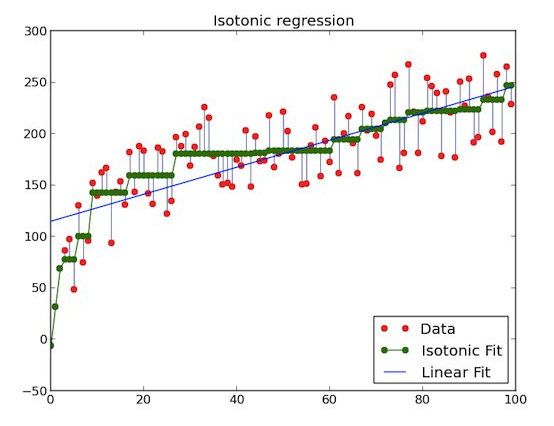

In [ ]:
from sklearn.datasets import make_regression

from sklearn.isotonic import IsotonicRegression

X, y = make_regression(n_samples=10, n_features=1, random_state=41)

iso_reg = IsotonicRegression().fit(np.hstack(X), y)

iso_reg.predict([.1, .2])

array([1.86282267, 3.72564535])

# Classificação

## Logistic Regression

* **penalty** (penalidade igual regressão porém em escala log)
* **C** outra regularização
* **solver** depende da penalidade

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Lg = LogisticRegression().fit(x_trainc,y_trainc)
Lg.score(x_testc,y_testc)

0.9736842105263158

# Algoritmos que servem para os dois

## SVM 

* SVC = Para classificação

* SVR = Para regressão

**Principais paramêtros:**

* Kernel: 
* C: 
* Gamma:
* Degree:

In [ ]:
from sklearn.svm import SVC

In [ ]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = SVC(decision_function_shape='ovo')
clf.fit(X, Y)

SVC(decision_function_shape='ovo')

## KNN

Principais parametros

* n_neighbors
* weights
* metric
* algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_trainc,y_trainc)

KNeighborsClassifier()

In [ ]:
knn.score(x_testc,y_testc)

1.0

## Naive Bayes

* Multinomial
* Bernoulli
* Gaussian

In [ ]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB()

## Decision Trees

*   from sklearn.tree import plot_tree
*   from sklearn.tree import DecisionTreeClassifier

Parametros

* criterion
* max_depth
* min_sample_leaf
* ccp_alpha
* max_features

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_trainc,y_trainc)

DecisionTreeClassifier()

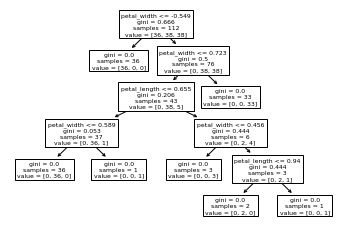

In [ ]:
plot_tree(dt,feature_names=X_clf.columns.tolist())
plt.show()

# LDA

* fit_transform

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis()

# Rede Neural

## Perceptron
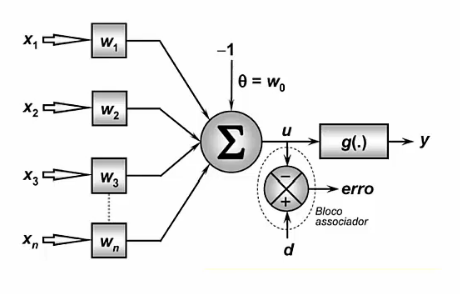

In [13]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)
model = OneVsRestClassifier(Perceptron())

cross_val_score(model,X_clf,Y_clf,cv=kfold)

array([1.        , 1.        , 1.        , 0.33333333, 0.        ,
       0.        , 0.73333333, 0.93333333, 0.4       , 1.        ])

## MLP

In [55]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(200,200,200))
cross_val_score(mlp,X_reg,Y_reg,cv=kfold,scoring='r2').mean()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # early_stopping in partial_fit doesn't make sense
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # early_stopping in partial_fit doesn't make sense
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # early_stopping in partial_fit doesn't make sense
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

0.21880281991908576

# Problemas multiclass 
Para problemas multiclass podemos utilizar de duas funções uteis do Sklearn sendo elas:

**OneVsRestClassifier**:
Que funciona da seguinte maneira
* Binary Classification Problem 1: red vs [blue, green]
* Binary Classification Problem 2: blue vs [red, green]
* Binary Classification Problem 3: green vs [red, blue]
 

**OneVsOneClassifier**:
Já para o OneVsOne
* Binary Classification Problem 1: red vs. blue
* Binary Classification Problem 2: red vs. green
* Binary Classification Problem 3: red vs. yellow
* Binary Classification Problem 4: blue vs. green
* Binary Classification Problem 5: blue vs. yellow
* Binary Classification Problem 6: green vs. yellow

Os principais algoritmos utilizados são **Logistic Regression** e **Perceptron**.

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
x_trainc,x_testc,y_trainc,y_testc = train_test_split(X_clf,Y_clf)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_trainc)
x_trainc = scaler.transform(x_trainc)
x_testc = scaler.transform(x_testc)

In [ ]:
model_multiclass = OneVsRestClassifier(LogisticRegression()).fit(x_trainc,y_trainc)

In [ ]:
model_multiclass.score(x_testc,y_testc)

0.9210526315789473

In [ ]:
print(classification_report(y_testc,model_multiclass.predict(x_testc)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.75      0.86        12
           2       0.80      1.00      0.89        12

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



# Calibração De Modelos

A calibração tem como objetivo calibrar a probabilidade advinda do **predict_proba** dos modelos, caso o modelo não tenha o predict_proba, podemos utilizar o **CalibratedClassifierCV**. 

**ALERTA** [ SE FITARMOS O NOSSO CLASSIFICADOR, TEREMOS QUE FITAR A CALIBRAÇÃO COM O CLASSIFICAR COM NOVOS DADOS ]

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

X_train, X_calib, y_train, y_calib = train_test_split( X, y, random_state=42 ) # SEPARANDO X CALIB X TRAIN

base_clf = LogisticRegression()

base_clf.fit(X_train, y_train)

calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv="prefit")

calibrated_clf.fit(X_calib, y_calib)

CalibratedClassifierCV(base_estimator=LogisticRegression(), cv='prefit')

len(calibrated_clf.calibrated_classifiers_)

calibrated_clf.predict_proba([[-0.5, 0.5]])


array([[0.86739646, 0.13260354]])